In [1]:
##########################################
# Setup project path to use 
# data_exploration.py and ml_modeling.py
##########################################

import os
import sys

# Set project path using platform/environment agnostic language
parent_project_name = 'Python_Notebooks_For_Machine_Learning'
path = os.getcwd()
parent_project_name = path[0: path.index(parent_project_name) + len(parent_project_name)]

# Import dex.py library
sys.path.insert(0, parent_project_name + os.sep + 'common')
import data_exploration as dex
import ml_modeling as ml

## Data Extraction
* Connect to SQL Server database
* Import data to DataFrame object

In [2]:
import pyodbc
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

conn_str = 'DRIVER={SQL Server};SERVER=localhost;DATABASE=data;'
cnxn = pyodbc.connect(conn_str)
cnxn.setdecoding(pyodbc.SQL_CHAR, encoding='utf-8')
cnxn.setencoding(encoding='utf-8')

In [3]:
query = "select * from CreditCard order by ID"
data = pd.read_sql(query, cnxn, index_col='id')
data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
id,,,,,,,,,,,,,,,,,,,,,
1,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
5,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,False


## Data Quality Report
* Look at quick statistics about our data
* Do we need to drop any features due to missing values (want null pct <30%)?

In [4]:
pd.set_option('display.max_columns', 50)
continuous_dqr, categorical_dqr, error = dex.get_data_quality_report(data)
continuous_dqr

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
count,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807
nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nulls pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,47488.1,1.9587,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,1.08885,1.02071,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.62446,0.605647,0.521278,0.482227,0.403632,0.330083,250.12
min,0,-56.4075,-72.7157,-48.3256,-5.68317,-113.743,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.79747,-18.6837,-5.79188,-19.2143,-4.49894,-14.1299,-25.1628,-9.49875,-7.21353,-54.4977,-34.8304,-10.9331,-44.8077,-2.83663,-10.2954,-2.60455,-22.5657,-15.4301,0
25%,54201.5,-0.920373,-0.59855,-0.890365,-0.84864,-0.691597,-0.768296,-0.554076,-0.20863,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.49885,-0.456299,-0.211721,-0.228395,-0.54235,-0.161846,-0.354586,-0.317145,-0.326984,-0.0708395,-0.0529598,5.6
50%,84692,0.0181088,0.0654856,0.179846,-0.0198465,-0.0543358,-0.274187,0.0401031,0.022358,-0.0514287,-0.0929174,-0.0327574,0.140033,-0.0135681,0.0506013,0.0480715,0.0664133,-0.0656758,-0.00363631,0.00373482,-0.0624811,-0.0294502,0.00678194,-0.0111929,0.0409761,0.0165935,-0.0521391,0.00134215,0.0112438,22
mean,94813.9,-2.74845e-15,-5.45754e-16,1.85397e-15,2.8054e-15,5.2439e-15,2.48442e-15,-8.40585e-16,-2.61374e-16,-1.76169e-15,2.10417e-15,9.53974e-16,-1.13936e-15,1.08484e-15,1.39163e-15,2.20303e-15,1.44823e-15,-3.27984e-16,1.81559e-15,1.24946e-15,5.66634e-16,-1.5086e-16,1.41122e-15,-9.82252e-17,4.58286e-15,4.72849e-16,1.67889e-15,-3.58649e-16,-1.05322e-16,88.3496
75%,139320,1.31564,0.803724,1.0272,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.49315,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.0910451,0.07828,77.165
max,172792,2.45493,22.0577,9.38256,16.8753,34.8017,73.3016,120.589,20.0072,15.595,23.7451,12.0189,7.84839,7.12688,10.5268,8.87774,17.3151,9.25353,5.04107,5.59197,39.4209,27.2028,10.5031,22.5284,4.58455,7.51959,3.51735,31.6122,33.8478,25691.2


* Data quality report revealed that data should be scaled

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical values to [0,1] and remove 'time' feature
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[[x for x in data.columns if x not in ['id', 'time','class']]])
scaled_data = pd.DataFrame(scaled_data)

scaled_data.index = data.index
scaled_data['class'] = data['class']
scaled_data.columns = [col for col in data.columns if col not in ['id','time']]

In [6]:
txns = scaled_data[[col for col in scaled_data.columns if col != 'class']]
txn_labels = scaled_data['class']

txn_legit = scaled_data[~scaled_data['class']]  # count: 284315
txn_fraud = scaled_data[scaled_data['class']]   # count: 492 

## Model Training

* Establish baseline model accuracy using traditional approach for **balanced** data sets

In [7]:
from sklearn.naive_bayes import GaussianNB, ComplementNB

classifier = GaussianNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         print_results=True,
                                                         description='Gaussian Naive Bayes')

classifier = ComplementNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         print_results=True,
                                                         description='Complement Naive Bayes')

= Gaussian Naive Bayes =
Accuracy:	 0.98
AUC:		 0.90
Precision:	 0.06
Recall:		 0.83
F1:		 0.11
Average time to train:  00:00:00.266047


= Complement Naive Bayes =
Accuracy:	 1.00
AUC:		 0.88
Precision:	 0.71
Recall:		 0.77
F1:		 0.74
Average time to train:  00:00:00.109938




### Sampling Methods
Try improving model performance with this imbalanced data set by using **under-sampling** and **over-sampling** methods

#### Under-sampling
* Near-Miss 2, 4 nearest neighbors

In [8]:
from imblearn.under_sampling import NearMiss

# Use NearMiss2 undersampling technique to balance data set 
# (majority class sampled until it is size N where N = size of minority class)
sampler = NearMiss(sampling_strategy='not minority', 
                   version=2, 
                   n_neighbors=4, 
                   #n_neighbors_ver3=3, 
                   n_jobs=1)

classifier = GaussianNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='Gaussian Naive Bayes w/ NM2')

classifier = ComplementNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='Complement Naive Bayes w/ NM2')

= Gaussian Naive Bayes w/ NM2 =
Accuracy:	 0.99
AUC:		 0.80
Precision:	 0.11
Recall:		 0.62
F1:		 0.18
Average time to train:  00:00:13.515818


= Complement Naive Bayes w/ NM2 =
Accuracy:	 1.00
AUC:		 0.84
Precision:	 0.87
Recall:		 0.68
F1:		 0.76
Average time to train:  00:00:13.418479




#### Over-sampling
* ADASYN, 5 nearest neighbors
* SMOTE, 5 k_neighbors, 10 m_neighbors

In [9]:
from imblearn.over_sampling import ADASYN

# Use ADASYN oversampling technique to balance data set
# (minority class sampled until it is size N where N = size of majority class)
sampler = ADASYN(sampling_strategy='not majority', 
                 n_neighbors=5,
                 n_jobs=1)

classifier = GaussianNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns,
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='Gaussian Naive Bayes w/ ADASYN')

classifier = ComplementNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='Complement Naive Bayes w/ ADASYN')

= Gaussian Naive Bayes w/ ADASYN =
Accuracy:	 0.96
AUC:		 0.92
Precision:	 0.04
Recall:		 0.88
F1:		 0.07
Average time to train:  00:00:03.715463


= Complement Naive Bayes w/ ADASYN =
Accuracy:	 0.94
AUC:		 0.92
Precision:	 0.03
Recall:		 0.91
F1:		 0.05
Average time to train:  00:00:03.443815




In [10]:
from imblearn.over_sampling import SMOTE

# Use SMOTE oversampling technique to balance data set
# (minority class sampled until it is size N where N = size of majority class)
sampler = SMOTE(sampling_strategy='not majority', 
                k_neighbors=5,
                m_neighbors=10,
                n_jobs=1)

classifier = GaussianNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='Gaussian Naive Bayes w/ SMOTE')

classifier = ComplementNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='Complement Naive Bayes w/ SMOTE')

= Gaussian Naive Bayes w/ SMOTE =
Accuracy:	 0.98
AUC:		 0.92
Precision:	 0.06
Recall:		 0.86
F1:		 0.11
Average time to train:  00:00:01.674837


= Complement Naive Bayes w/ SMOTE =
Accuracy:	 1.00
AUC:		 0.88
Precision:	 0.77
Recall:		 0.77
F1:		 0.77
Average time to train:  00:00:01.385806




#### Combination Over-/Under-sampling
* SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

# Use SMOTETomek oversampling technique to balance data set
# (minority class sampled until it is size N where N = size of majority class, 
# then majority/minority class pairs that are closer to each other than any other pairs
# are removed from the data set -> better boundary separation)
sampler = SMOTETomek(sampling_strategy='not majority')

classifier = GaussianNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='Gaussian Naive Bayes w/ SMOTETomek')

classifier = ComplementNB()
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='Complement Naive Bayes w/ SMOTETomek')


### Further Experimentation
* Borderline SMOTE w/ SVM

In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Vanilla SVC
classifier = SVC(gamma='auto')
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=scaled_data[[col for col in scaled_data.columns if col != 'class']], 
                                                         labels=scaled_data['class'], 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         print_results=True,
                                                         description='SVC')
# Vanilla Bagging SVC
classifier = BaggingClassifier(base_estimator=SVC(gamma='auto'),
                               n_estimators=4,
                               n_jobs=4,
                               max_samples=.5)
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=scaled_data[[col for col in scaled_data.columns if col != 'class']], 
                                                         labels=scaled_data['class'], 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         print_results=True,
                                                         description='SVC Bagging Ensemble')

= SVC Bagging Ensemble =
Accuracy:	 1.00
AUC:		 0.74
Precision:	 0.85
Recall:		 0.49
F1:		 0.62
Average time to train:  00:00:04.705396




In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

# SVC w/ SMOTE
sampler = BorderlineSMOTE()
classifier = SVC(gamma='auto')
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='SVC w/ Borderline SMOTE')

# Bagging SVC w/ SMOTE
classifier = BaggingClassifier(base_estimator=SVC(gamma='auto'),
                               n_estimators=4,
                               n_jobs=4,
                               max_samples=.5)
avg_acc, avg_auc, avg_f1 = ml.train_and_score_classifier(classifier=classifier, 
                                                         df=txns, 
                                                         labels=txn_labels, 
                                                         n_folds=5, 
                                                         pos_label=True,
                                                         shuffle=True,
                                                         sampler=sampler,
                                                         print_results=True,
                                                         description='SVC Bagging Ensemble w/ Borderline SMOTE')


### Data visualization

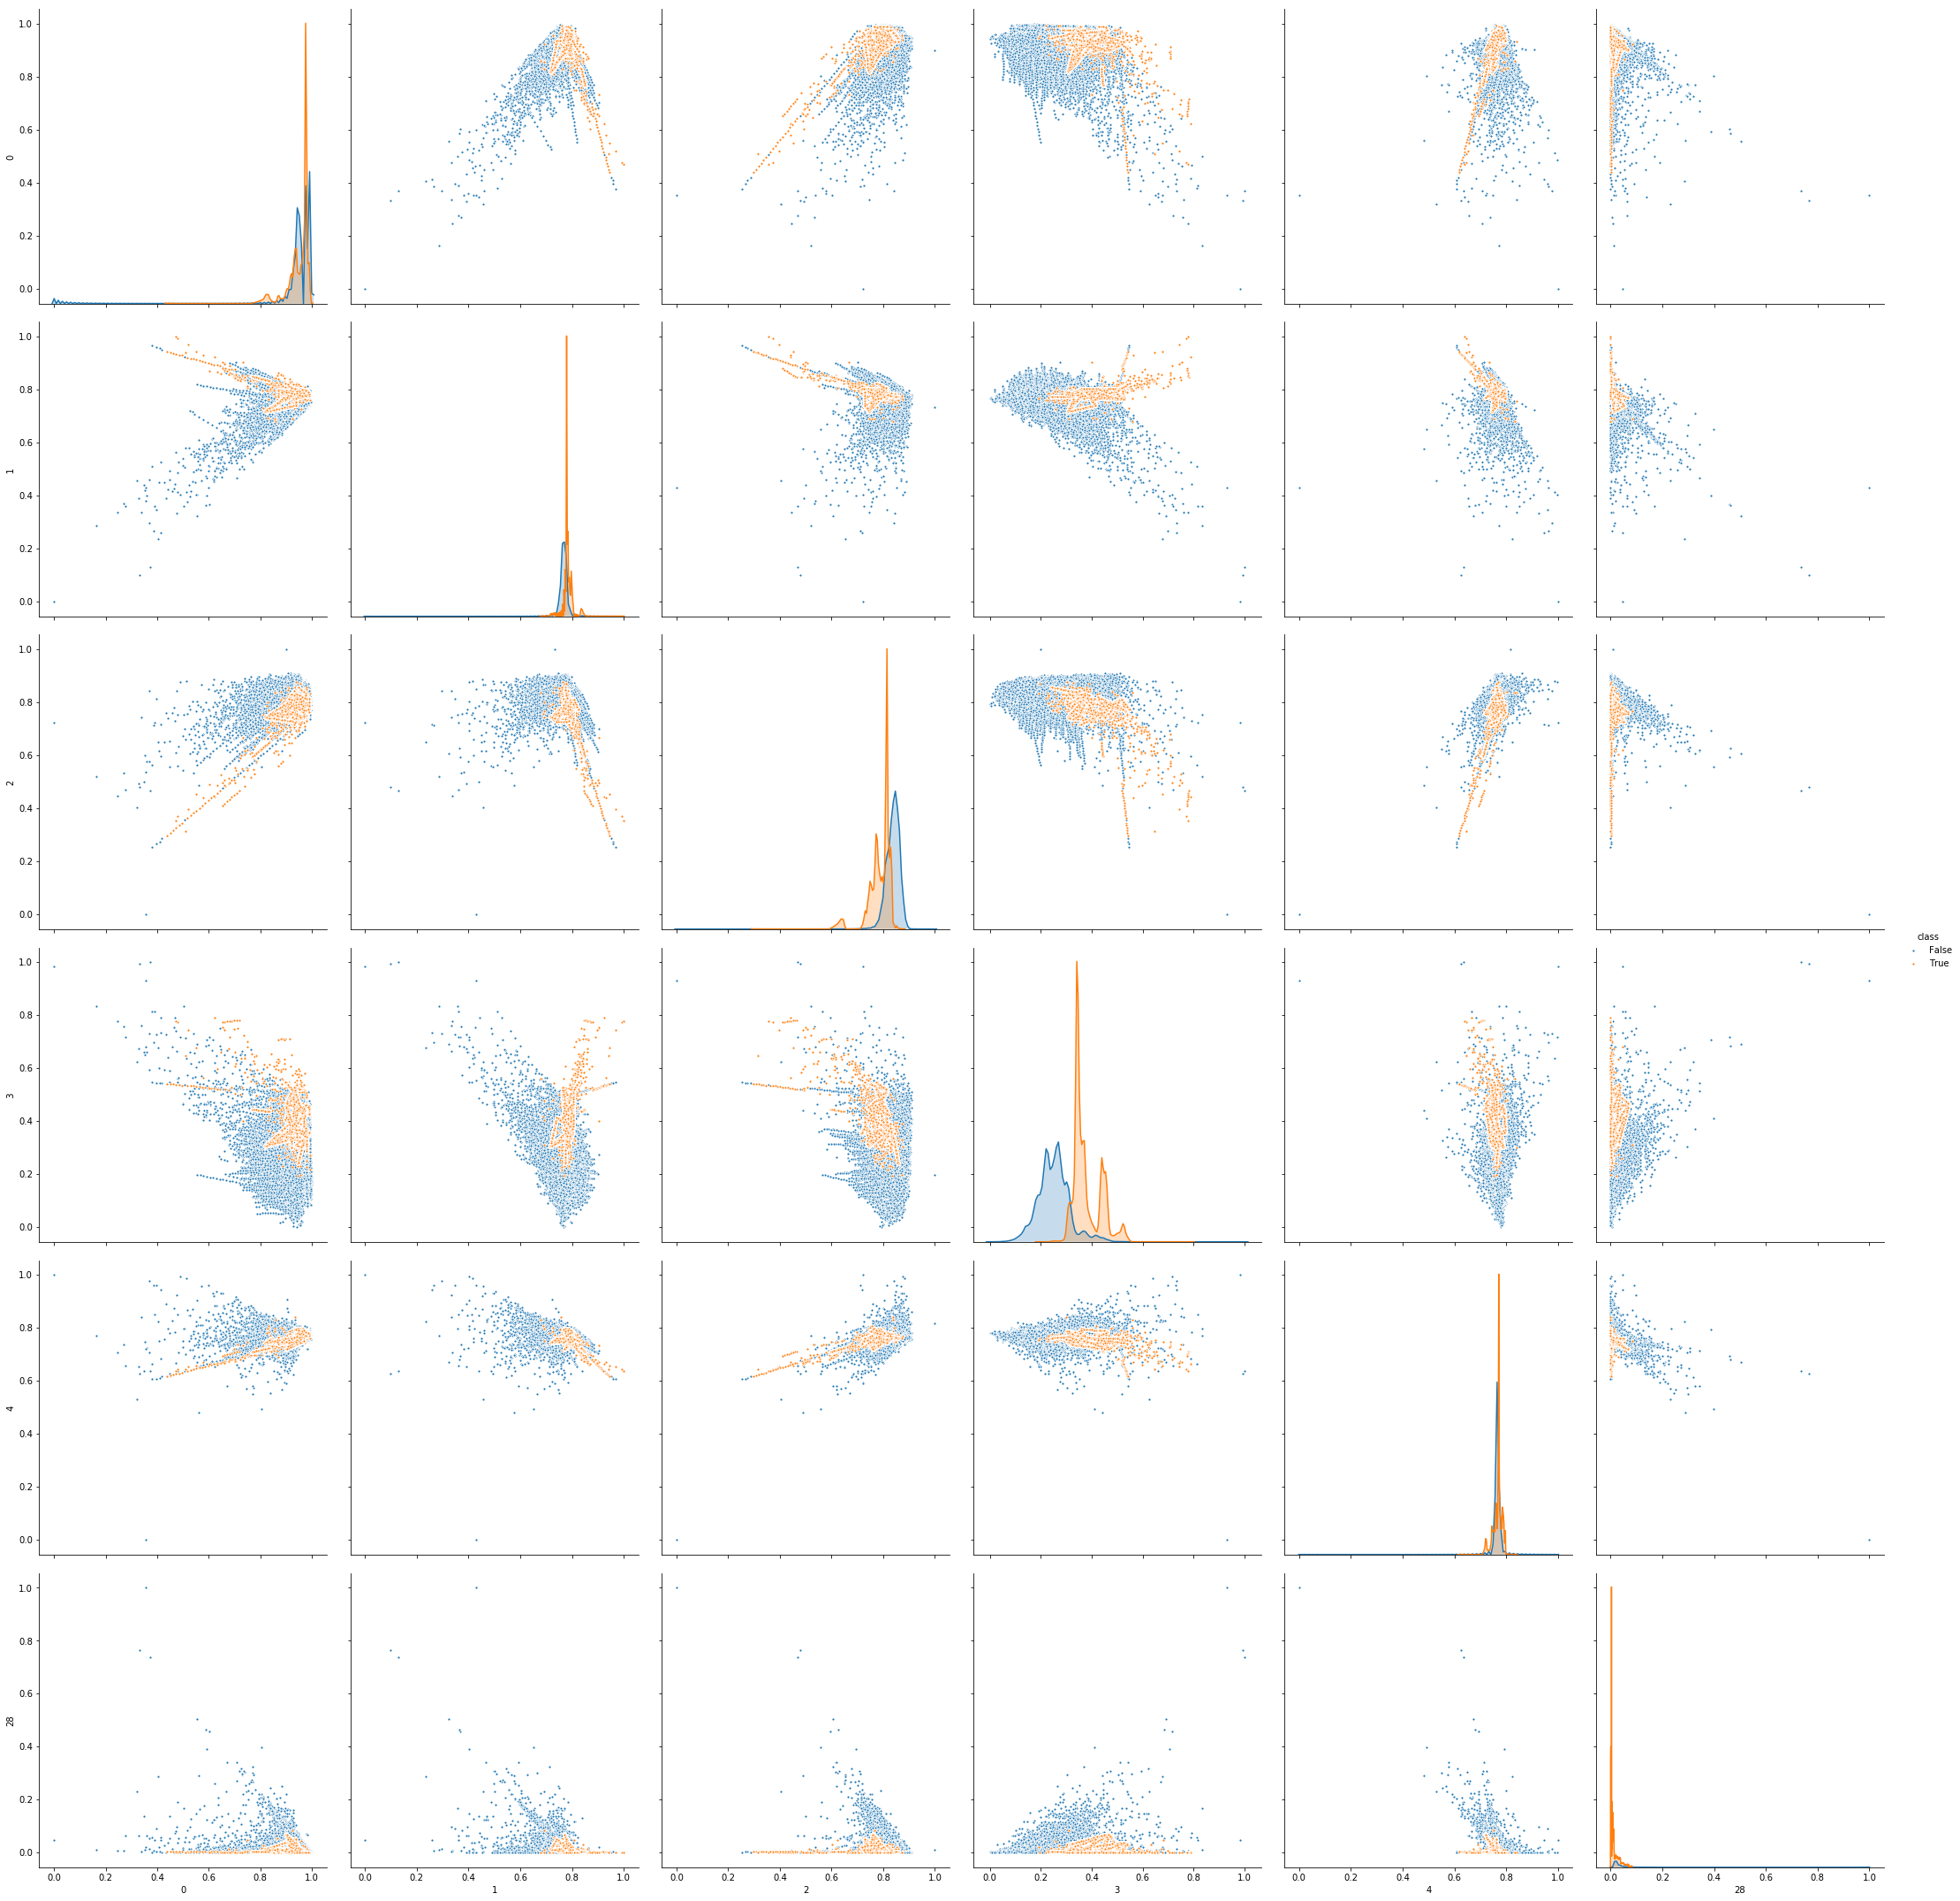

In [10]:
txns_resampled['class'] = txns_labels_resampled

sns.pairplot(data=txns_resampled, 
             vars=[0,1,2,3,4,28], 
             hue='class',
             markers='.',
             height=5,
             aspect=1)

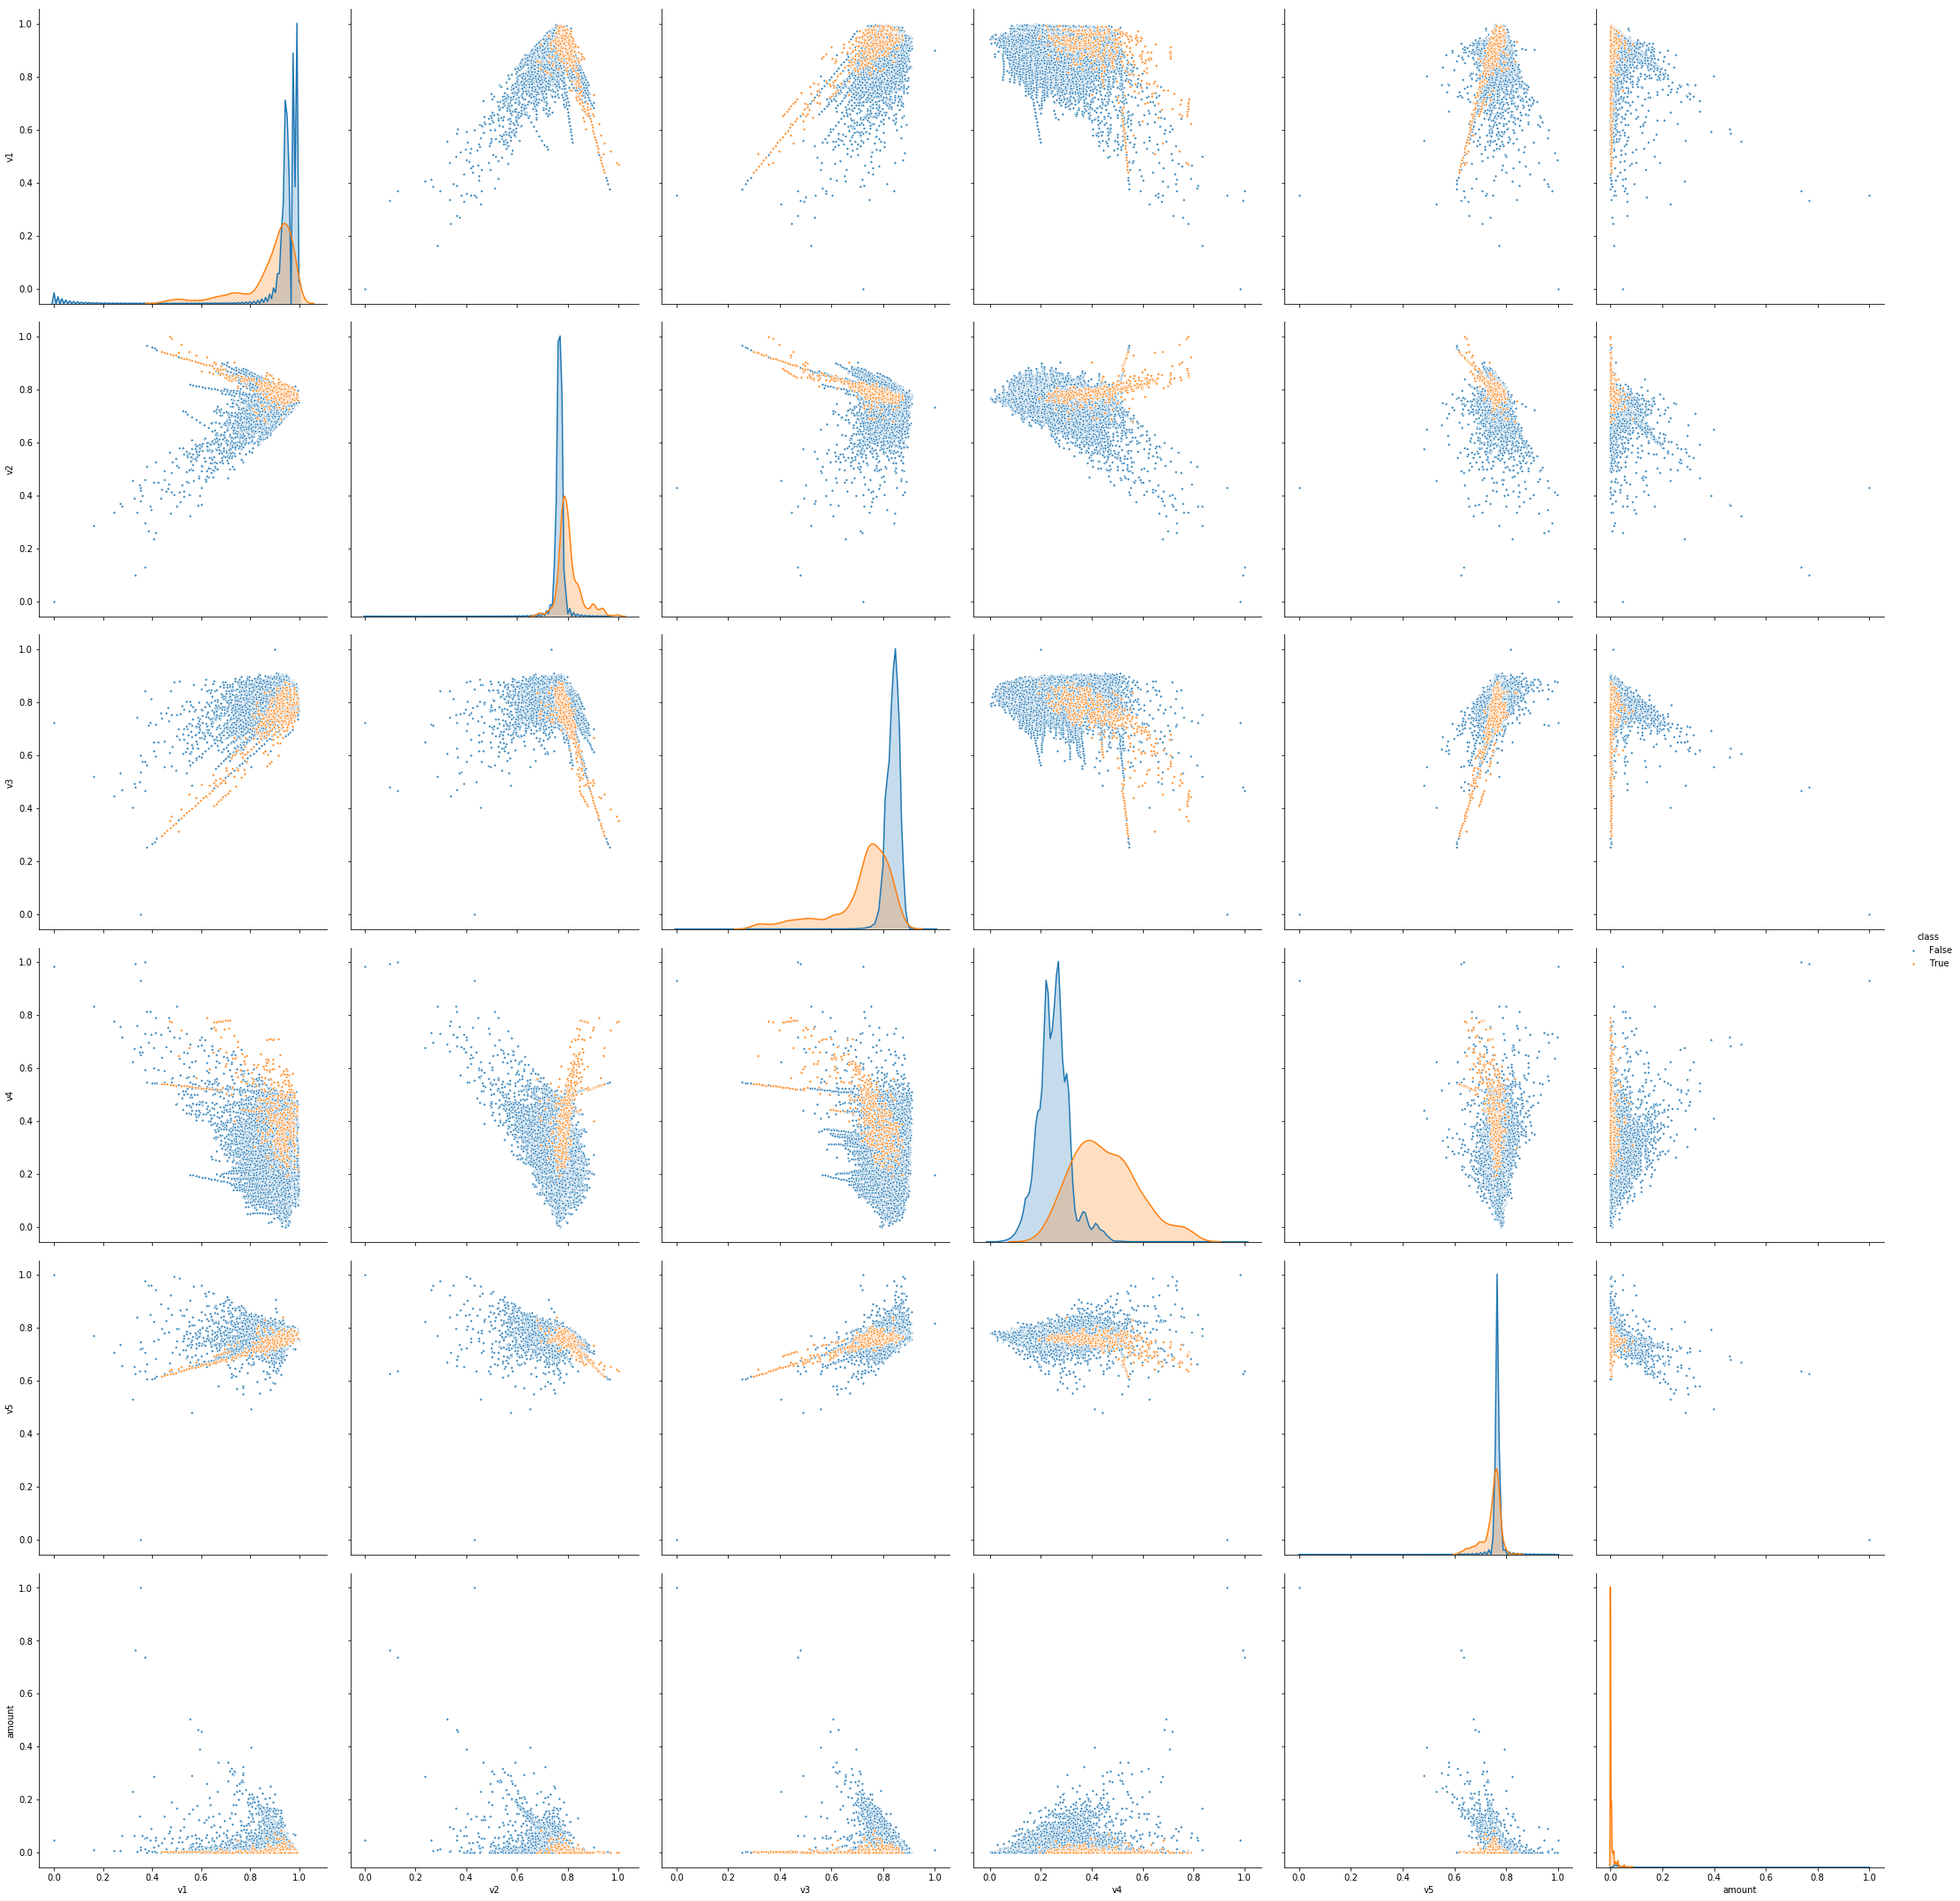

In [12]:
sns.pairplot(data=scaled_data, 
             vars=['v1','v2','v3','v4','v5','amount'], 
             hue='class',
             markers='.',
             height=5,
             aspect=1)